# 第4回: 一階常微分方程式

## 概要
第4回の講義では，解法の導入として一階の常微分方程式について説明する．このような微分方程式を扱うためには，変数分離法，積分因子法，完全微分方程式による解法など方程式の形に応じて主要な解法が存在する．ここでは，最も基本的で強力な変数分離法を紹介する．本講義では以下の点を理解できることを期待する．

- 一階常微分方程式の形式を理解する．
- 一階常微分方程式の一般的な解法である変数分離法を使いこなすことができる．
- 実際に計算した方程式の解をプログラミングする．

## 一階常微分方程式 →[[Stream](https://web.microsoftstream.com/video/8f69510e-274f-4c9e-93c0-37236102889d)]
復習であるが，一階常微分方程式とは，独立変数が一つで，かつ未知関数の導関数が1階であるときの微分方程式である．その一般形は以下のように表される．

$$
\begin{align}
\frac{dy}{dx} = f(x,y)
\end{align}
$$

ここで，独立変数は$x$，求めたい未知関数は$y=y(x)$，その導関数は$\frac{dy}{dx}$であり，右辺の$x$と$y$の関数$f(x,y)$の形状に応じて解法が異なる．

## 直接積分形
変数分離法の前に前回の講義の復習をする．前回は関数 $f(x,y)$ が変数$x$にのみ依存した関数$g(x)$であるときの場合を考えた．すなわち，

$$
\begin{align}
\frac{dy}{dx} = g(x)
\end{align}
$$

の関数の形式の微分方程式である．この微分方程式の一般解は以下で与えられる．

$$
\begin{align}
y(x) = \int g(x) dx + C
\end{align}
$$

ただし，$C$は積分定数である．

### 一般解の導出
与えられた一階常微分方程式が上記のような形状に変形可能であるとき，次のステップを踏むことで未知関数 $y=y(x)$ を計算できる．

まず，前述した分離形の微分方程式の両辺に$dx$をかけると以下のようになる

$$
\begin{align}
dy = g(x)dx
\end{align}
$$

式を見てわかるように，$x$と$y$の項がそれぞれ両辺に移項できたことがわかる．続いて両辺を積分する．

$$
\begin{align}
\int dy = \int g(x)dx
\end{align}
$$

この積分を求めるとで以下の微分方程式の解である未知関数 $y(x)$が得られる．

$$
\begin{align}
y(x) = \int g(x) dx + C
\end{align}
$$

ただし，$C$は積分定数である．これは後述する変数分離法で$y$に関する項がないときの特殊な形式である．

## 変数分離形
変数分離形とは，微分方程式の関数 $f(x,y)$が$x$と$y$のそれぞれの関数$g(x),h(y)$に分離できるときに利用できる解法である．すなわち，

$$
\begin{align}
\frac{dy}{dx} = g(x)h(y)
\end{align}
$$

に式変形できるときに利用される方法である．変数分離形は常微分方程式の解法の中でも最も基本的で強力な解法の一つであるので，実際に計算し，身につけてほしい．

### 変数分離形の解法
与えられた一階常微分方程式が上記のような形状に式変形可能であるとき，次のステップを踏むことで未知関数 $y=y(x)$ を計算できる．

まず，前述した分離形の微分方程式の両辺に$dx$をかけると以下のようになる

$$
\begin{align}
dy = g(x)h(y)dx
\end{align}
$$

続いて，両辺を$h(y)$で割ると以下のようになる．

$$
\begin{align}
\frac{1}{h(y)}dy = g(x)dx
\end{align}
$$

式を見てわかるように，$x$と$y$の項がそれぞれ両辺に移項できたことがわかる．最後に両辺を積分する．

$$
\begin{align}
\int\frac{1}{h(y)}dy = \int g(x)dx
\end{align}
$$

この積分を実行することで微分方程式の解である未知関数 $y(x)$を求めることができる．

### 変数分離形の具体例
では，次の微分方程式を変数分離形で解いてみよう．以下の微分方程式は $g(x)=1, h(y)=y$のときの場合である．

$$
\begin{align}
\frac{dy}{dx} = y
\end{align}
$$

解答はクリックで確認できる．

````{toggle}
まず，左辺に $y$ のみ，右辺に $x$ の項のみとなるように整理すると，

$$
\begin{align}
\frac{dy}{y} = dx
\end{align}
$$

となる．続いて，両辺を積分することを考える．

$$
\begin{align}
\int \frac{dy}{y} = \int dx
\end{align}
$$

より，積分すると以下となる．

$$
\begin{align}
\log |y| = x + C'
\end{align}
$$


ここで本来ならば，左辺の積分定数 $C_1$ と右辺の積分定数 $C_2$ が存在するがまとめて $C'=C_1 + C_2$ としている．対数の定義より，$\log |y| = x \rightarrow e^x = |y|$ であり，絶対値を外すと，$y=\pm e^x$ となる．よって一般解は，

$$
\begin{align}
|y| &= e^{x + C'} \\
y &= \pm e^{C'} e^x \\
y & = C e^x
\end{align}
$$

となる．ただし，$C=\pm e^{C'}$ としている．以上より，与えられた微分方程式を変数分離形で解くことができた．
````

### Pythonによる実装
では，上記の微分方程式をsympyで解く．単一のセルで作成したが，各行での動作は前回の講義のようにStep-by-stepで確認されたい．

In [1]:
from sympy import symbols, Eq, Derivative, Function, dsolve

# 変数と未知関数の定義
x = symbols('x')
y = Function('y')(x)

# dy/dxの定義
dy = Derivative(y, x)

# 微分方程式の定義
eq = Eq(dy, y)

# 微分方程式を解く
y_ = dsolve(eq, y)
y_

Eq(y(x), C1*exp(x))

手計算と結果が一致することを確認されたい．最後に解集合を可視化する．

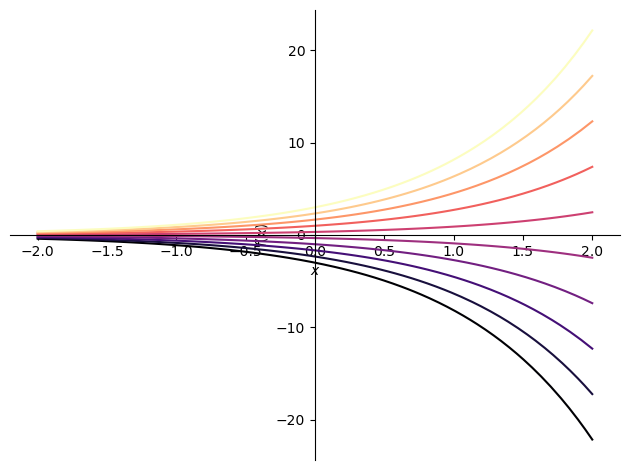

In [2]:
import numpy as np
from sympy import plotting
import matplotlib.pyplot as plt

N = 10

eqs = []
for c in np.linspace(-3, 3, N):
    eqs.append(y_.rhs.subs(symbols('C1'), c))
p = plotting.plot(*eqs, (x, -2, 2), show=False)

cm = plt.get_cmap('magma', N)
for i in range(cm.N):
    p[i].line_color = cm(i)
p.show()


### 課題
**課題1:** 次の微分方程式の一般解を求めよ．

$$
\begin{align}
\frac{dy}{dx} + y = 1
\end{align}
$$

**課題2:** 次の微分方程式の一般解を求めよ．

$$
\begin{align}
\frac{dy}{dx} = xy
\end{align}
$$

**課題3:** 次の微分方程式の一般解を求めよ．

$$
\begin{align}
\frac{dy}{dx} = y^2 + 1
\end{align}
$$

**課題4:** 次の微分方程式の一般解を求めよ．

$$
\begin{align}
\left( x + 1\right) \frac{dy}{dx} = y
\end{align}
$$

**課題5:** 問1-4の微分方程式をsympyで実装し，手計算の結果と一致することを確認せよ．

## 同次微分方程式 →[[Stream](https://web.microsoftstream.com/video/a91c3a3f-a473-4189-b282-483e072fd925)]
同次微分方程式とは，微分方程式の関数 $f(x,y)$ が$f(\frac{y}{x})$であるとき，つまり，以下のような形式の微分方程式のことを示す．

$$
\begin{align}
\frac{dy}{dx} = f\left(\frac{y}{x}\right)
\end{align}
$$

この一般解は以下で与えられる．

$$
\begin{align}
\int \frac{1}{f(u) -u}du= \log | x | + C
\end{align}
$$

ただし，$C$は積分定数とする．

### 一般解の導出
同次微分方程式をを解くためには，$\frac{y}{x}=u$として変数変換をすれば良い．この変数変換は

$$
\begin{align}
\frac{y}{x}=u \Rightarrow y = xu
\end{align}
$$

であり，これを$x$について微分すると，

$$
\begin{align}
\frac{dy}{dx} = u + x\frac{du}{dx}
\end{align}
$$

のようになる．ここで $u=y/x$ という $x$ の関数なので右辺は積の微分を利用する．そして，$u$について整理すると，

$$
\begin{align}
\frac{du}{dx} = \frac{1}{x} \left(\frac{dy}{dx} -u\right)
\end{align}
$$

となり，$\frac{dy}{du}=f\left(\frac{y}{x}\right)=f(u)$であるので，次の形になる．

$$
\begin{align}
\frac{du}{dx} = \frac{1}{x} \left(f(u) -u\right)
\end{align}
$$

上記の式は $u$ と $x$ のみが含まれ，$u$ と $x$ について以下のように整理すると変数分離形となる．

$$
\begin{align}
\frac{1}{f(u) -u}du= \frac{1}{x} dx
\end{align}
$$

変数分離形の解法と同様に両辺を積分し，

$$
\begin{align}
\int \frac{1}{f(u) -u}du= \int \frac{1}{x} dx
\end{align}
$$

以下の一般解が得られる．

$$
\begin{align}
\int \frac{1}{f(u) -u}du= \log | x | + C
\end{align}
$$

ただし，$C$は積分定数とする．

```{admonition} 積の微分法則
積の微分法則とは $y=f(x)g(x)$ という関数の変数$x$ の微分は以下となる法則である．

$$
\frac{dy}{dx} = f'(x)g(x) + f(x)g'(x)
$$

$u$ の変数変換では，$u$ は $x$ の関数であるので，$y'=u'x + ux'$ という微分になっていることに注意されたい．
```

### 同次微分方程式の具体例
では，次の同次微分方程式を解いてみよう．

$$
\frac{dy}{dx} = \frac{x^2 + y^2}{xy}
$$

解答はクリックで確認できる．

````{toggle}

一見すると変数分離形とも同次形とも見て取れないが，ここで，右辺を $x^2$ で割ると以下のように $y/x$ の形が現れる．

$$
\frac{dy}{dx} = \frac{1 + \left(\frac{y}{x}\right)^2}{\left(\frac{y}{x}\right)}
$$

ここで $u=\frac{y}{x}$ として変数変換をする．前述より，

$$
\begin{align}
u + x\frac{du}{dx} &= \frac{1 + u^2}{u}
\end{align}
$$

であり，変数変換をした $y$ の導関数を $\frac{dy}{dx} = \frac{1 + u^2}{u}$ を代入すると

$$
\begin{align}
\frac{dy}{dx} &= u + x\frac{du}{dx} \\
u + x\frac{du}{dx} &= \frac{1 + u^2}{u} \\
x\frac{du}{dx} &= \frac{1 + u^2}{u} - u \\
x\frac{du}{dx} &= \frac{1}{u} \\
u du &= \frac{1}{x} dx
\end{align}
$$

と変数分離形となった．変数分離形の解法にしたがって両辺を積分する．

$$
\begin{align}
\int u du &= \int \frac{1}{x} dx \\
\frac{u^2}{2} &= \log |x| + D \\
u^2 &= 2 \log |x| + 2D \\
\end{align}
$$

最後に，$u=\frac{y}{x}$ を代入し，$y$ について整理すると，

$$
\begin{align}
\frac{y^2}{x^2} &= 2 \log |x| + 2D \\
y^2 &= 2 x^2 \log |x| + 2D x^2 \\
y &= \pm x \sqrt{2 \log |x| + C}
\end{align}
$$

として，一般解が得られる．ここで，$D$は積分定数であり，$C=2D$とした．
````

### Pythonによる実装
では，これをsympyで解く．

In [3]:
# 変数，関数，導関数を定義．
x = symbols('x')
y = Function('y')(x)
dy = Derivative(y, x)

# 与えられた同次微分方程式を定義
eq = Eq(dy, (x**2 + y**2) / (x*y))

# 微分方程式を解く．
y_ = dsolve(eq, y)

このとき手計算した一般解からもわかるように $y$ は二つの一般解を持つことに注意する．

In [4]:
y_[0]

Eq(y(x), -x*sqrt(C1 + 2*log(x)))

In [5]:
y_[1]

Eq(y(x), x*sqrt(C1 + 2*log(x)))

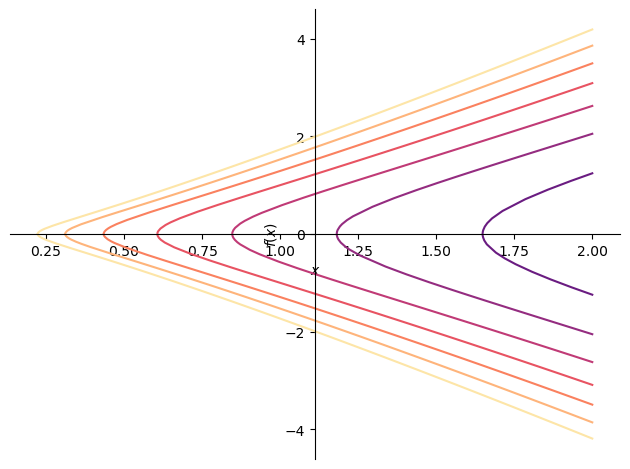

In [6]:
import numpy as np
from sympy import plotting
import matplotlib.pyplot as plt

N = 10

eqs = []
for c in np.linspace(-3, 3, N):
    eqs.append(y_[0].rhs.subs(symbols('C1'), c))
    eqs.append(y_[1].rhs.subs(symbols('C1'), c))
p = plotting.plot(*eqs, (x, -2, 2), show=False)

cm = plt.get_cmap('magma', N*2)
for i in range(0, cm.N, 2):
    p[i].line_color = cm(i)
    p[i+1].line_color = cm(i)
p.show()

### 課題
**課題1:** 次の微分方程式の一般解を求めよ．

$$
\begin{align}
x^2\frac{dy}{dx} = y^2
\end{align}
$$

**課題2:** 次の微分方程式の一般解を求めよ．

$$
\begin{align}
\frac{dy}{dx} = \frac{x+y}{x}
\end{align}
$$

**課題3:** 次の微分方程式の一般解を求めよ．

$$
\begin{align}
\frac{dy}{dx} = \frac{x-y}{x+y}
\end{align}
$$

**課題4:** 問1-3の微分方程式をsympyで実装し，手計算の結果と一致することを確認せよ．

## 次回の講義について
次回は，常微分方程式の一種である線形微分方程式について解法を紹介する．